# Single layer perceptron (for custom dataset)

In [11]:
# import packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import pandas as pd

In [12]:
subcell_matrix = pd.read_csv(r"D:\CodingProjects\image_analysis_DL\data\uniprotkb_subcel_seq_metrics.tsv", 
                             sep='\t')
subcell_matrix.head()

,Entry,Organism,Length,Mass,EC number
0,A0A024B7W1,Zika virus (isolate ZIKV/Human/French Polynesi...,3423,379113,2.1.1.56; 2.1.1.57; 2.7.7.48; 3.4.21.91; 3.6.1...
1,A0A061AE05,Caenorhabditis elegans,654,73172,2.7.1.25; 2.7.7.4
2,A0A061I403,Cricetulus griseus (Chinese hamster) (Cricetul...,455,51477,2.7.7.108; 3.1.4.-
3,A0A067XGX8,Petunia hybrida (Petunia),512,57062,2.5.1.54
4,A0A067XH53,Petunia hybrida (Petunia),533,58894,2.5.1.54


In [13]:
# provide categorical label as an integer
subcell_matrix.loc[~subcell_matrix['Organism'].str.contains(
    'Homo sapiens'), 'Organism'] = '1'
subcell_matrix.loc[subcell_matrix['Organism'].str.contains(
    'Homo sapiens'), 'Organism'] = '0'
subcell_matrix['Organism'] = subcell_matrix['Organism'].astype(int)


# exapnd enzyme catalog number into its separate classes for individual 
# features processing
subcell_matrix['EC number'] = subcell_matrix['EC number'].str.split(';').str[0]
subcell_matrix[['reaction type', 'enzyme sub class 1',
                'enzyme sub class 2','enzyme identity']] = \
                    subcell_matrix['EC number'].str.split('.', expand=True)
subcell_matrix.drop(columns=['EC number', 'Entry'], inplace=True)

# remove erroneous texts in the now-expanded EC number columns
for bad_text in '-|n2|n4|n7|n9|n11'.split('|'):
    subcell_matrix = subcell_matrix[~subcell_matrix.isin([bad_text]).any(axis=1)]

# typecast to a fully int dataframe for easy standardization
subcell_matrix = subcell_matrix.apply(pd.to_numeric)

In [14]:
X = subcell_matrix[['Length', 'Mass', 'reaction type', 'enzyme sub class 1',
                    'enzyme sub class 2','enzyme identity']]
y = subcell_matrix['Organism']

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=60)

In [20]:
# Standardize the features (to ensure each feature equally 
# contributes to the final output of our dataset)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# Create and train the Single-Layer Perceptron
slp = Perceptron(max_iter=100, tol=1e-3, random_state=20)
slp.fit(X_train, y_train)


Perceptron(max_iter=100, random_state=20)

In [23]:
# Make predictions on the test set
y_pred = slp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 98.09%


In [24]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

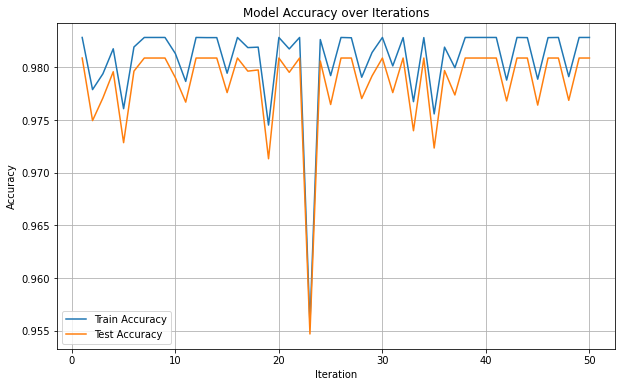

In [27]:
import numpy as np
import matplotlib.pyplot as plt
# Initialize the Perceptron
max_iter = 50
slp = Perceptron(max_iter=1, tol=None, random_state=42, warm_start=True)

# Lists to store accuracy values
train_accuracies = []
test_accuracies = []

# Training loop to record accuracy over iterations
for i in range(max_iter):
    slp.partial_fit(X_train, y_train, classes=np.unique(y))
    train_pred = slp.predict(X_train)
    test_pred = slp.predict(X_test)
    
    train_accuracies.append(accuracy_score(y_train, train_pred))
    test_accuracies.append(accuracy_score(y_test, test_pred))

# Plotting the accuracy over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_iter + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, max_iter + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Model Accuracy over Iterations')
plt.legend()
plt.grid(True)
plt.show()
